# Decision Tree Classifier for Diabetes Prediction

This notebook implements a **Decision Tree** algorithm using `scikit-learn` for the Pima Indians Diabetes Database. The task is to predict whether a patient has diabetes (1) or not (0) based on several diagnostic measures. We will build, evaluate, and visualize the decision tree. 

In [1]:
# Import pandas for data manipulation and reading CSV files.
import pandas as pd
# Import NumPy for numerical operations.
import numpy as np
# Import pydotplus for visualizing the decision tree.
import pydotplus

# Import necessary modules from scikit-learn.
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix

# Import additional utilities for visualization.
from six import StringIO
from IPython.display import Image

## 1. Data Loading and Preparation

We'll load the dataset from a local CSV file. Since the file doesn't have a header, we'll provide our own column names.

In [2]:
# Define the column names for the dataset.
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Set the path to your CSV file.
# For this to work, 'diabetes.csv' must be in the same directory as this notebook.
path = "diabetes-1.csv"

try:
    pima = pd.read_csv(path, header=None, names=col_names)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{path}' was not found.")
    print("Please make sure the CSV file is in the correct directory.")
    pima = None

if pima is not None:
    # Display the first five rows of the DataFrame to inspect the data.
    display(pima.head())

Dataset loaded successfully!


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Feature Selection and Data Splitting

Next, we separate our data into features (input variables, `X`) and the target variable (output, `y`). Then we split these into training and testing sets.

In [3]:
if pima is not None:
    # Define the list of feature columns to be used as input for the model.
    feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
    
    # Create the feature matrix (X).
    X = pima[feature_cols]
    # Create the target vector (y).
    y = pima.label
    
    # Split the dataset into a training set (70%) and a testing set (30%).
    # random_state=1 ensures reproducibility.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 3. Building the Decision Tree (Gini Index)

We'll now build our first decision tree model using the **Gini impurity** as the criterion for splitting nodes. We'll limit the tree's depth to 3 to keep it interpretable and prevent overfitting.

In [4]:
if pima is not None:
    # Create an instance of the DecisionTreeClassifier using Gini impurity.
    clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1)

    # Train (fit) the classifier on the training data.
    clf_gini = clf_gini.fit(X_train, y_train)

    # Use the trained classifier to make predictions on the test data.
    y_pred_gini = clf_gini.predict(X_test)

    # --- Evaluate the Model ---
    print("--- Model using Gini Index ---")
    # Calculate and print the accuracy.
    print(f"Accuracy: {accuracy_score(y_test, y_pred_gini):.4f}")
    # Create and print the confusion matrix.
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_gini)}")

--- Model using Gini Index ---
Accuracy: 0.7576
Confusion Matrix:
[[127  19]
 [ 37  48]]


### Visualizing the Gini Tree

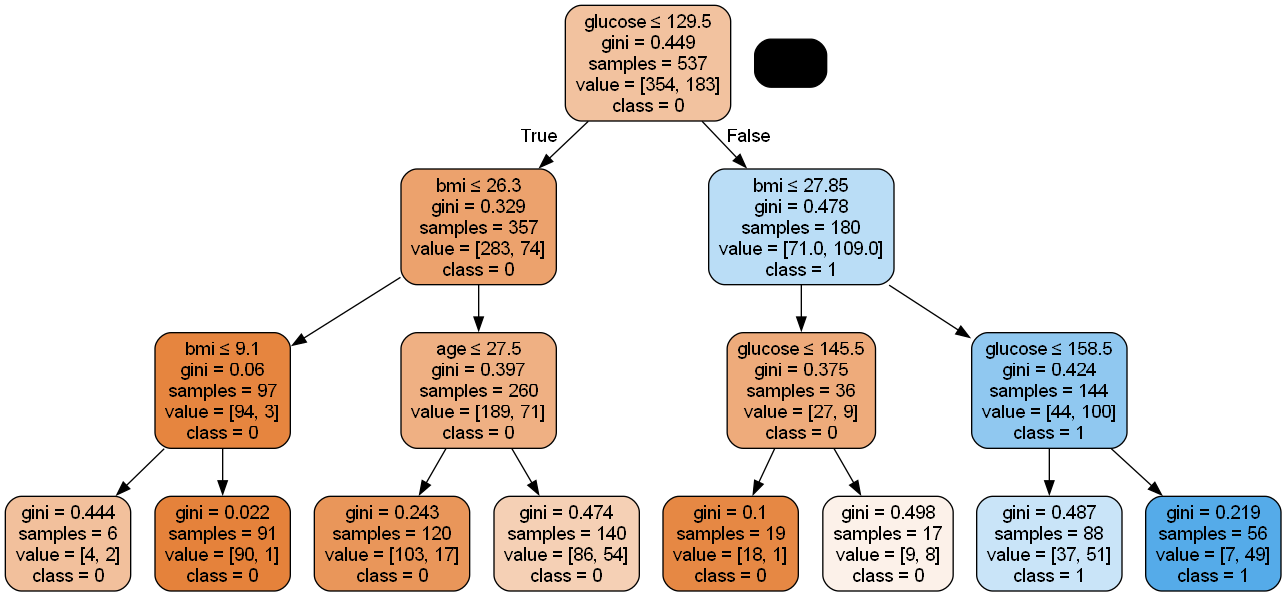

In [5]:
if pima is not None:
    # Create an in-memory text buffer.
    dot_data_gini = StringIO()
    
    # Export the trained classifier into the DOT format.
    export_graphviz(clf_gini, out_file=dot_data_gini,
                    filled=True, rounded=True,
                    special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
    
    # Create a graph object from the DOT data.
    graph_gini = pydotplus.graph_from_dot_data(dot_data_gini.getvalue())
    
    # Display the generated image.
    display(Image(graph_gini.create_png()))

## 4. Building the Decision Tree (Entropy / Information Gain)

As an alternative, we can use **Entropy** as the splitting criterion. Entropy is a measure of disorder or uncertainty, and the algorithm aims to make splits that maximize **Information Gain** (the reduction in entropy).

In [6]:
if pima is not None:
    # Create another classifier, this time using entropy as the criterion.
    clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)

    # Train the classifier.
    clf_entropy = clf_entropy.fit(X_train, y_train)

    # Make predictions.
    y_pred_entropy = clf_entropy.predict(X_test)

    # --- Evaluate the Model ---
    print("--- Model using Entropy ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_entropy):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_entropy)}")

--- Model using Entropy ---
Accuracy: 0.7706
Confusion Matrix:
[[124  22]
 [ 31  54]]


### Visualizing the Entropy Tree

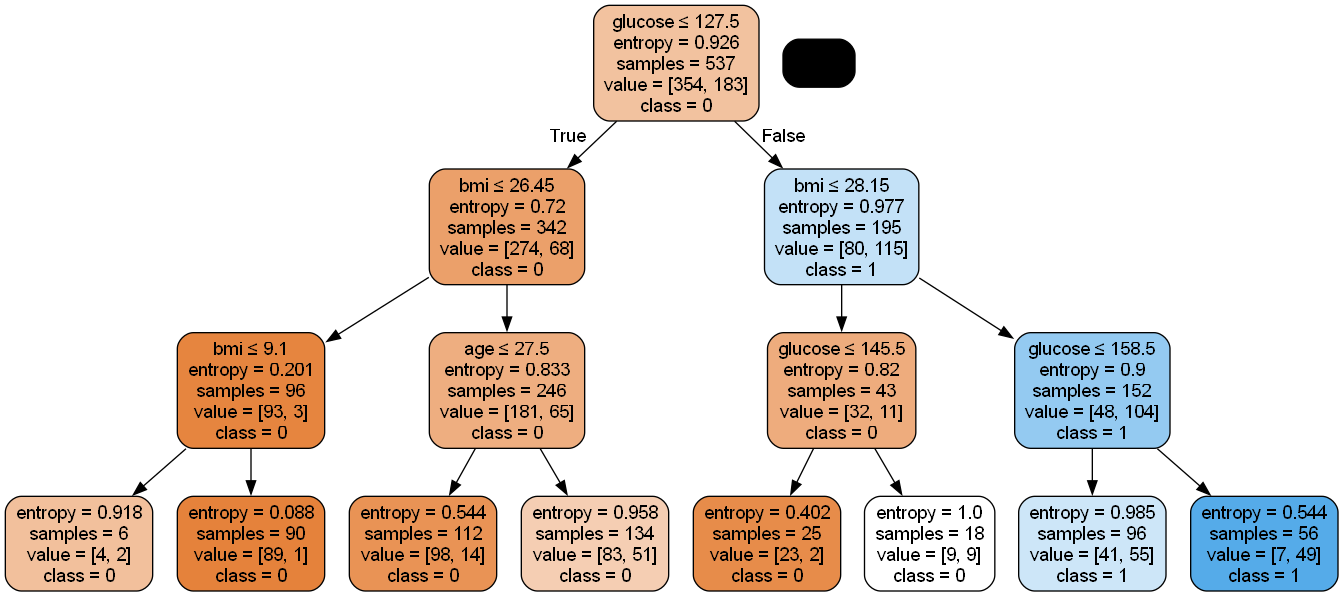

In [7]:
if pima is not None:
    # Create an in-memory text buffer.
    dot_data_entropy = StringIO()
    
    # Export the trained classifier into the DOT format.
    export_graphviz(clf_entropy, out_file=dot_data_entropy,
                    filled=True, rounded=True,
                    special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
    
    # Create a graph object from the DOT data.
    graph_entropy = pydotplus.graph_from_dot_data(dot_data_entropy.getvalue())
    
    # Display the generated image.
    display(Image(graph_entropy.create_png()))